<a href="https://colab.research.google.com/github/Pabitra-M/DataScience/blob/main/notebooks/ml_models/Practical_simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


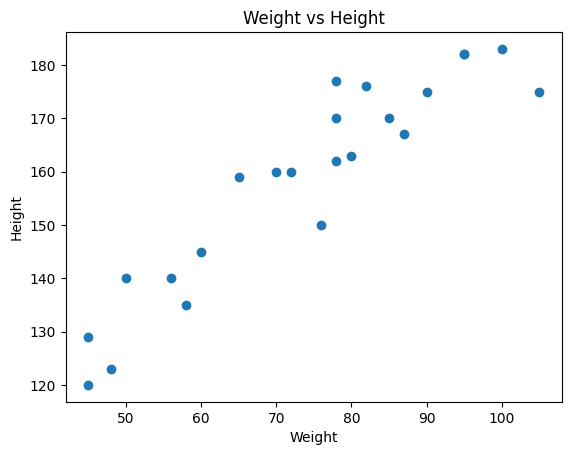

In [5]:
## scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')
plt.show()

In [6]:
## corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


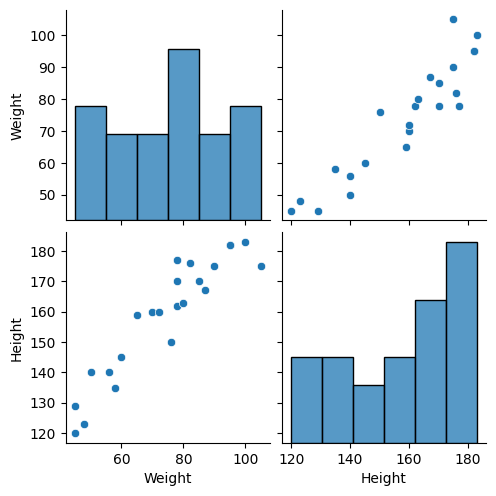

In [8]:
sns.pairplot(df)

In [12]:
## independent vs dependent
X = df[['Weight']] ## independent should be data frame or 2 dimensnional array
y = df['Height'] ## dependent should be series or 1 dimensional array

In [13]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
## Standardizaton
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
## apply linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression(n_jobs=-1)

In [24]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [25]:
print("Cofficient or slope", regression.coef_)
print("Intercept", regression.intercept_)

Cofficient or slope [17.2982057]
Intercept 156.47058823529412


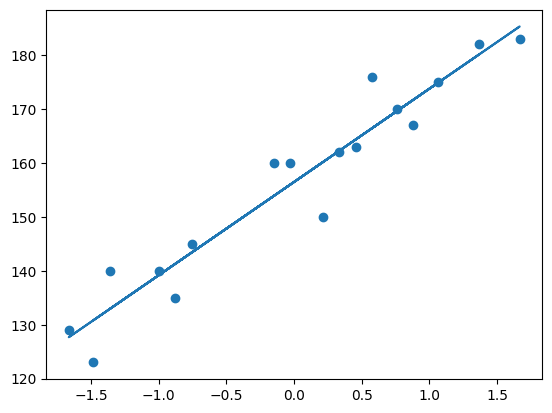

In [27]:
## plot Training data plote best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

# Prediction test data
1. prediction hight output = intercept + coef_(Weight)
2. y_pred_test = 156 + 17.29(X_test)

In [28]:
## prediction for test data
Y_pred = regression.predict(X_test)

In [29]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mse = mean_squared_error(y_test, Y_pred)
mae = mean_absolute_error(y_test, Y_pred)
rmse = np.sqrt(mse)
print("MSE", mse)
print("MAE", mae)
print("RMSE", rmse)

MSE 114.84069295228699
MAE 9.66512588679501
RMSE 10.716374991212605


In [34]:
from sklearn.metrics import r2_score

In [36]:
score = r2_score(y_test, Y_pred)
print(score)

0.7360826717981276


In [37]:
## Displ;ay Adjustend R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [38]:
## osl linear Regression

import statsmodels.api as sm

In [39]:
model = sm.OLS(y_train, X_train).fit()

In [40]:
prediction = model.predict(X_test)

In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 17 Jul 2025   Prob (F-statistic):                       0.664
Time:                        16:46:48   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [43]:
regression.predict(sc.transform([[83]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([167.50462234])